In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.ar_model import AR,ARResults

df = pd.read_csv('tempandq.csv',index_col='date',parse_dates=True)
df.index.freq = 'D'

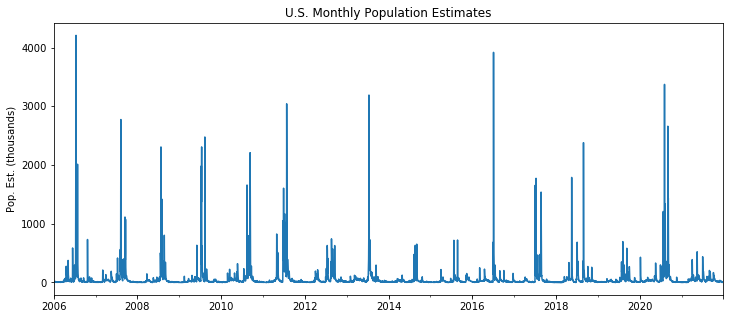

In [3]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df['q'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [4]:
len(df)

5844

In [5]:
train = df.iloc[:4384]
test = df.iloc[4383:]

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
model = AR(train['q'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const    20.257624
L1.q      0.693770
dtype: float64


In [8]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [9]:
predictions1

2018-01-02    22.132886
2018-01-03    35.612767
2018-01-04    44.964709
2018-01-05    51.452811
2018-01-06    55.954064
2018-01-07    59.076900
2018-01-08    61.243431
2018-01-09    62.746507
2018-01-10    63.789296
2018-01-11    64.512753
2018-01-12    65.014665
2018-01-13    65.362878
2018-01-14    65.604457
2018-01-15    65.772058
2018-01-16    65.888334
2018-01-17    65.969003
2018-01-18    66.024969
2018-01-19    66.063796
2018-01-20    66.090734
2018-01-21    66.109422
2018-01-22    66.122387
2018-01-23    66.131382
2018-01-24    66.137623
2018-01-25    66.141952
2018-01-26    66.144956
2018-01-27    66.147040
2018-01-28    66.148485
2018-01-29    66.149488
2018-01-30    66.150184
2018-01-31    66.150667
                ...    
2021-12-03    66.151761
2021-12-04    66.151761
2021-12-05    66.151761
2021-12-06    66.151761
2021-12-07    66.151761
2021-12-08    66.151761
2021-12-09    66.151761
2021-12-10    66.151761
2021-12-11    66.151761
2021-12-12    66.151761
2021-12-13    66

In [11]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['q'][i]}")

predicted=22.13288598, expected=2.7030000000000003
predicted=35.61276656, expected=2.793
predicted=44.96470926, expected=2.8939999999999997
predicted=51.45281068, expected=0.0
predicted=55.95406367, expected=0.0
predicted=59.07689995, expected=8.841000000000001
predicted=61.24343145, expected=3.292
predicted=62.74650697, expected=0.0
predicted=63.78929633, expected=3.4619999999999997
predicted=64.51275277, expected=0.0
predicted=65.01466546, expected=3.635
predicted=65.36287766, expected=0.0
predicted=65.60445698, expected=0.0
predicted=65.77205758, expected=3.983
predicted=65.88833391, expected=4.869
predicted=65.969003  , expected=0.0
predicted=66.02496883, expected=0.0
predicted=66.06379627, expected=10.707
predicted=66.0907336 , expected=5.348
predicted=66.10942192, expected=0.003
predicted=66.12238732, expected=5.558
predicted=66.13138234, expected=0.213
predicted=66.13762281, expected=0.37799999999999995
predicted=66.14195227, expected=5.898
predicted=66.14495592, expected=0.0
pr

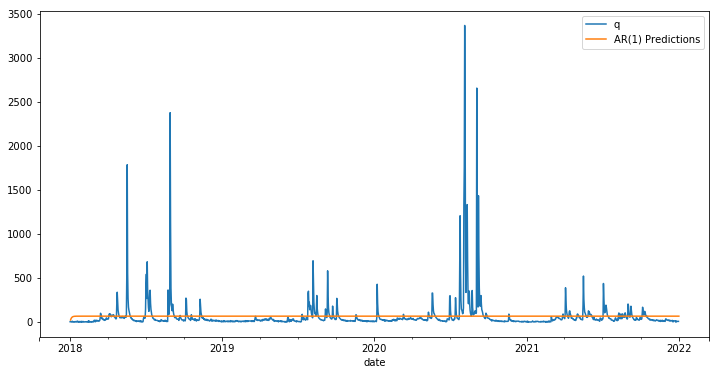

In [12]:
test['q'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

In [13]:
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const    21.171428
L1.q      0.725033
L2.q     -0.045043
dtype: float64


In [14]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

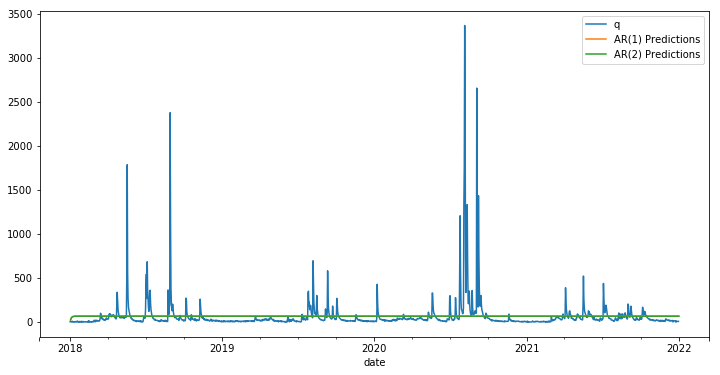

In [15]:
test['q'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

In [16]:
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 31
Coefficients:
const    12.090159
L1.q      0.740441
L2.q     -0.193701
L3.q      0.225100
L4.q     -0.123974
L5.q      0.100285
L6.q     -0.072958
L7.q      0.017072
L8.q      0.011903
L9.q      0.022188
L10.q     0.017639
L11.q    -0.018480
L12.q     0.081993
L13.q    -0.016087
L14.q    -0.017112
L15.q     0.024727
L16.q    -0.019401
L17.q    -0.018737
L18.q     0.032362
L19.q    -0.010424
L20.q     0.006150
L21.q    -0.022986
L22.q    -0.001060
L23.q     0.000692
L24.q     0.015509
L25.q    -0.034220
L26.q     0.017251
L27.q     0.001536
L28.q     0.065360
L29.q    -0.021760
L30.q     0.002935
L31.q     0.004057
dtype: float64


In [17]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

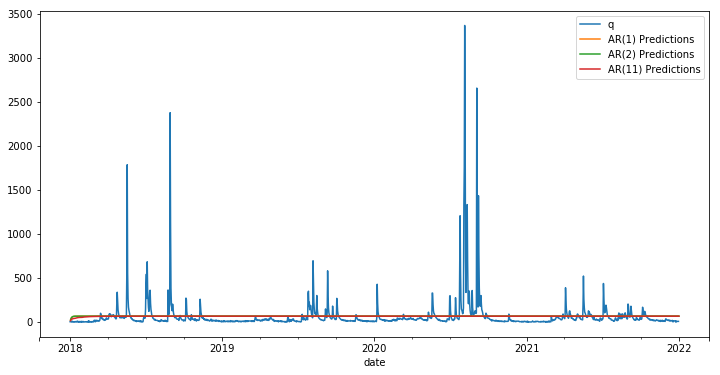

In [18]:
test['q'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

In [19]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['q'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 36336.68535
AR(2) Error: 36337.97743
AR(11) Error: 36282.82439


C:\Users\min\anaconda3\envs\tsa_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [20]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC:   10.1
AR(2) AIC:   10.1
AR(11) AIC: 10.114


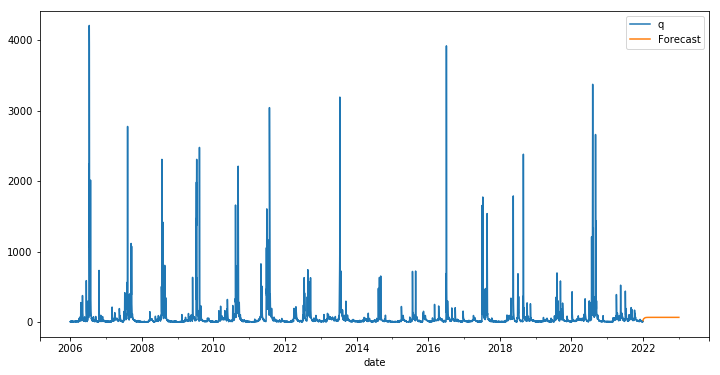

In [23]:
# First, retrain the model on the full dataset
model = AR(df['q'])

# Next, fit the model
ARfit = model.fit(maxlag=11,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+365, dynamic=False).rename('Forecast')

# Plot the results
df['q'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));